### Importing Required Libraries

In this step, we import the essential Python libraries that will be used throughout the project:

- **numpy** and **pandas** → for numerical operations and data manipulation  
- **matplotlib** and **seaborn** → for creating visualizations  
- **KMeans** from scikit-learn → to perform clustering on the dataset  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Loading and Inspecting the Dataset

Here, we load the `Mall_Customers.csv` file into a pandas DataFrame.  
We then explore the dataset using common methods:

- `.head(5)` → shows the first 5 rows  
- `.shape` → gives the number of rows and columns  
- `.describe()` → summary statistics of numerical columns  
- `.info()` → data types and non-null counts  
- `.isnull().sum()` → checks for missing values  

This step helps us understand the structure and quality of the dataset before applying clustering.  


In [6]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [24]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Selecting Relevant Features

Clustering is performed on **Annual Income** and **Spending Score**, since they are the most relevant features for customer segmentation in this dataset.  

We extract these two columns using `.iloc` and store them in variable `x`.  


In [12]:
x = df.iloc[ :,[3,4]].values

In [13]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Finding the Optimal Number of Clusters (Elbow Method)

The Elbow Method is used to determine the best number of clusters.  
We calculate **WCSS (Within-Cluster Sum of Squares)** for cluster numbers ranging from 1 to 10.  

- Lower WCSS means tighter, better clusters.  
- We look for the "elbow point" in the graph where adding more clusters does not significantly reduce WCSS.  

This helps us decide that **5 clusters** is the optimal choice for this dataset.  


In [14]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)

  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

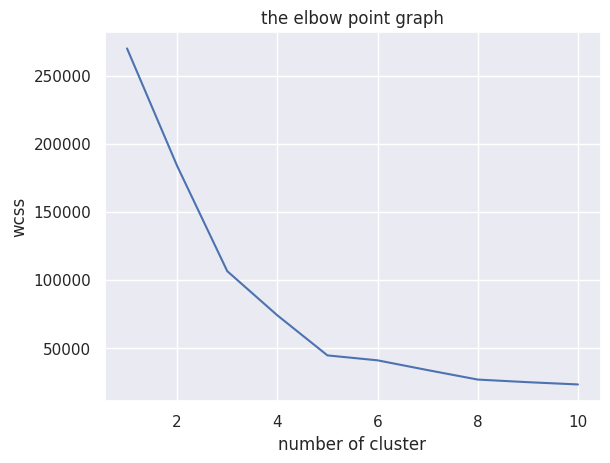

In [15]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow point graph')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

### Training the KMeans Algorithm

Based on the Elbow Method, we apply KMeans with **5 clusters**.  

- `fit_predict()` assigns each customer to one of the 5 clusters.  
- The output (`y`) contains the cluster labels for all data points.  


In [16]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)

#return a label for each data
y = kmeans.fit_predict(x)

print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualizing the Customer Clusters

We create a scatter plot to visualize the 5 clusters:

- Each cluster is represented by a different color.  
- The **centroids** (cluster centers) are shown in cyan.  
- X-axis → Annual Income  
- Y-axis → Spending Score  

This visualization clearly shows customer groups based on their spending behavior and income levels.  


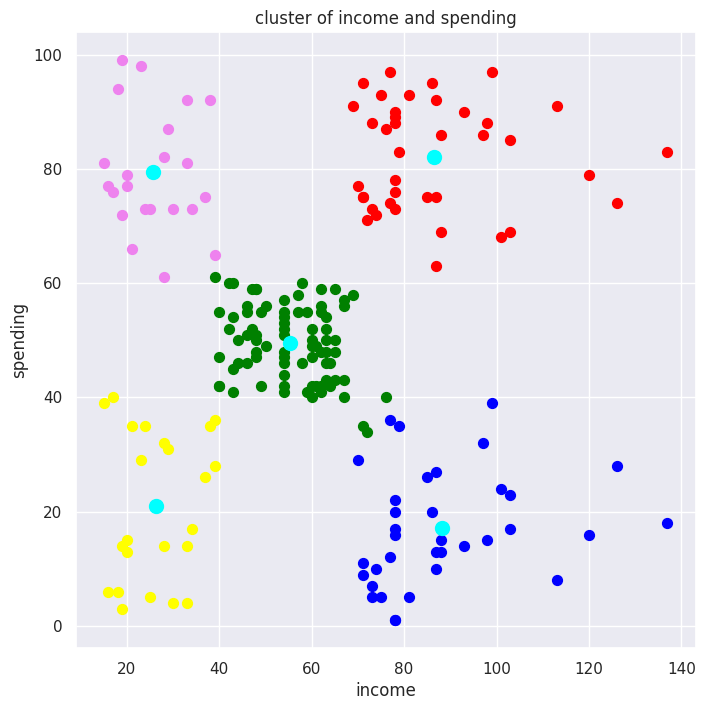

In [17]:
#ploting all the cluster

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s = 50, c ='green', label = 'cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s = 50, c ='red', label = 'cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s = 50, c ='blue', label = 'cluster 3')
plt.scatter(x[y==3,0],x[y==3,1], s = 50, c ='yellow', label = 'cluster 4')
plt.scatter(x[y==4,0],x[y==4,1], s = 50, c ='violet', label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[ :,0],kmeans.cluster_centers_[ :,1], s = 100, c= 'cyan', label= 'centeriod' )

plt.title('cluster of income and spending')
plt.xlabel('income')
plt.ylabel('spending')
plt.show()

### Viewing Cluster Details

Here, we print separate tables for each of the 5 clusters.  

Each table contains customer details such as:  
- CustomerID  
- Gender  
- Age  
- Annual Income  
- Spending Score  

This allows us to inspect the characteristics of each cluster in detail.  


In [21]:
# Add cluster labels to your dataset
df['Cluster'] = kmeans.labels_

# Create and print tables for each cluster
for i in range(5):  # because you have 5 clusters
    cluster_table = df[df['Cluster'] == i][['CustomerID', 'Gender', 'Age',
                                                'Annual Income (k$)', 'Spending Score (1-100)']]
    print(f"\n--- Cluster {i} ---\n")
    print(cluster_table.to_string(index=False))  # print without index for clean table



--- Cluster 0 ---

 CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
         44 Female   31                  39                      61
         47 Female   50                  40                      55
         48 Female   27                  40                      47
         49 Female   29                  40                      42
         50 Female   31                  40                      42
         51 Female   49                  42                      52
         52   Male   33                  42                      60
         53 Female   31                  43                      54
         54   Male   59                  43                      60
         55 Female   50                  43                      45
         56   Male   47                  43                      41
         57 Female   51                  44                      50
         58   Male   69                  44                      46
         59 Female   27     

### Saving Clusters into Separate CSV Files

Finally, we export each cluster into its own CSV file (`cluster_0.csv`, `cluster_1.csv`, ..., `cluster_4.csv`).  

This makes it easy to use the cluster data for further analysis, reporting, or visualization outside of this notebook.  


In [22]:
# Save each cluster into a separate CSV file
for i in range(5):
    cluster_table = df[df['Cluster'] == i][['CustomerID', 'Gender', 'Age',
                                                'Annual Income (k$)', 'Spending Score (1-100)']]
    file_name = f"cluster_{i}.csv"
    cluster_table.to_csv(file_name, index=False)
    print(f"✅ Saved {file_name}")


✅ Saved cluster_0.csv
✅ Saved cluster_1.csv
✅ Saved cluster_2.csv
✅ Saved cluster_3.csv
✅ Saved cluster_4.csv
